In [1]:
from sklearn.svm import SVC
from sklearn.ensemble import BaggingClassifier
from sklearn.datasets import make_classification
import warnings 
warnings.filterwarnings("ignore")

In [2]:
X,y=make_classification(n_samples=100,n_features=4,n_redundant=0,n_informative=2,random_state=0,shuffle=False)

In [3]:
X

array([[ 4.22341441e-01, -2.05321581e+00,  9.10178908e-01,
         3.17218215e-01],
       [-1.25732069e+00, -3.19826339e+00,  7.86327962e-01,
        -4.66419097e-01],
       [ 1.23195055e+00, -9.95105317e-01, -9.44446256e-01,
        -4.10049693e-01],
       [-4.37843295e-02, -1.27395967e+00, -1.70204139e-02,
         3.79151736e-01],
       [-1.30819171e+00, -1.28532883e+00,  2.25930895e+00,
        -4.22571517e-02],
       [-1.62073375e+00, -2.22244349e+00, -9.55945000e-01,
        -3.45981776e-01],
       [-3.59967304e-01, -1.41363563e+00, -4.63595975e-01,
         4.81481474e-01],
       [-7.62884416e-01, -1.45125944e+00, -1.54079701e+00,
         6.32619942e-02],
       [ 4.86681188e-01, -1.45709006e+00,  1.56506538e-01,
         2.32181036e-01],
       [-2.68051210e-01, -4.47369310e-01, -5.97316069e-01,
        -2.37921730e-01],
       [-3.69743600e+00, -4.61220130e-01, -1.42406091e+00,
        -4.93319883e-01],
       [ 1.83324682e-01, -7.66054695e-01, -5.42861476e-01,
      

In [4]:
y

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1])

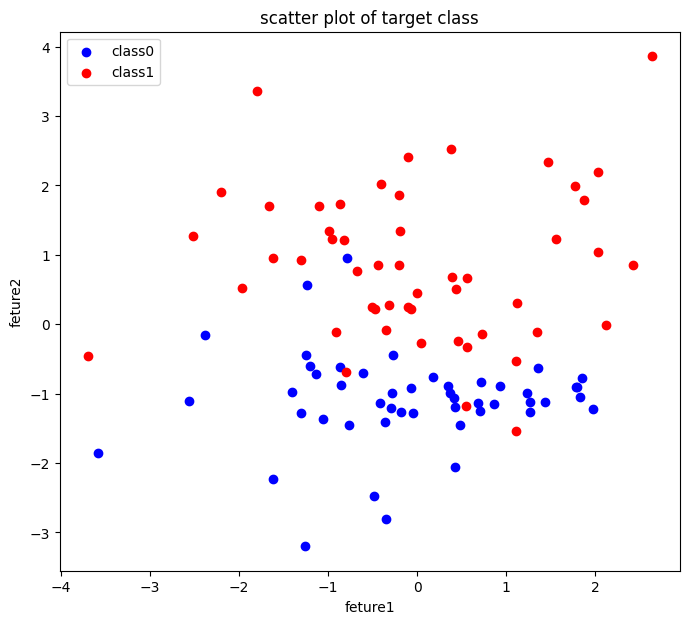

In [5]:
import matplotlib.pyplot as plt
plt.figure(figsize=[8,7])
plt.scatter(X[y==0][:,0],X[y==0][:,1],color="blue",label="class0")
plt.scatter(X[y==1][:,0],X[y==1][:,1],color="red",label="class1")
plt.title("scatter plot of target class")
plt.xlabel("feture1")
plt.ylabel("feture2")
plt.legend()
plt.show()

In [6]:
# using bagging classifier

clf=BaggingClassifier(SVC(),n_estimators=10,random_state=0).fit(X,y)

In [7]:
clf

BaggingClassifier(base_estimator=SVC(), random_state=0)

In [8]:
BaggingClassifier(clf,n_estimators=10,random_state=0).fit(X,y)

BaggingClassifier(base_estimator=BaggingClassifier(base_estimator=SVC(),
                                                   random_state=0),
                  random_state=0)

In [9]:
clf.predict([[0,0,0,0]])

array([1])

In [10]:
clf.predict([[2.3,4.9,3.9,2.9]])

array([1])

In [11]:
clf2=BaggingClassifier().fit(X,y)

In [12]:
clf2.predict([[2.3,4.9,3.9,2.9]])

array([1])

In [13]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import plot_tree

In [14]:
X,y=make_classification(n_features=5,random_state=0,n_redundant=0,n_informative=5,n_clusters_per_class=1)

In [15]:
df=pd.DataFrame(X,columns=["col1","col2","col3","col4","col5"])
df["Target"]=y

<IPython.core.display.Javascript object>

In [16]:
df.head()

,col1,col2,col3,col4,col5,Target
0,-2.688014,2.517617,-3.709784,0.497767,2.006716,0
1,-0.897058,1.000720,-1.262075,0.503085,1.614389,0
2,0.454782,-2.461140,-1.100978,-1.861955,-2.480726,1
3,0.302512,-0.595175,0.834284,3.635996,0.542202,1
4,-0.578231,0.554277,-0.264237,1.170973,0.743356,0


In [17]:
bag=BaggingClassifier()

In [18]:
bag.fit(df.iloc[:,:5],df.iloc[:,-1])

BaggingClassifier()

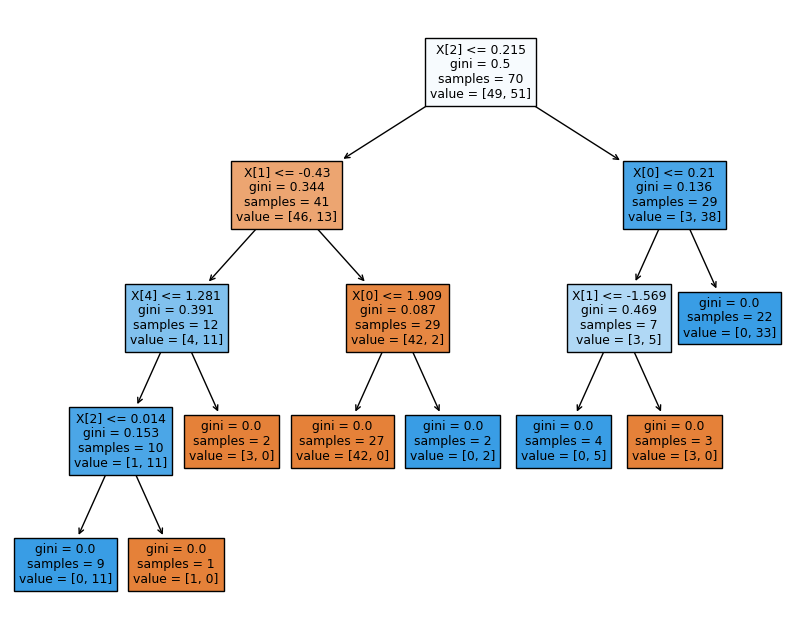

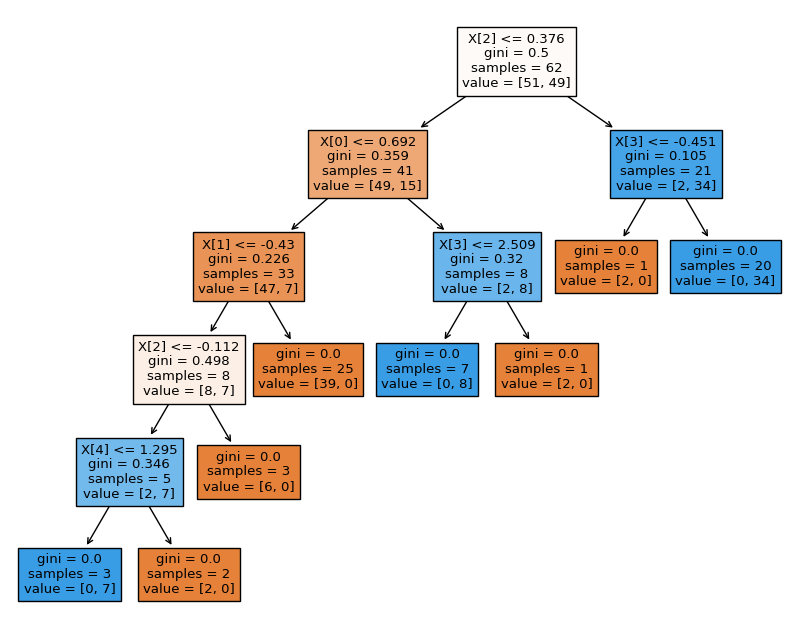

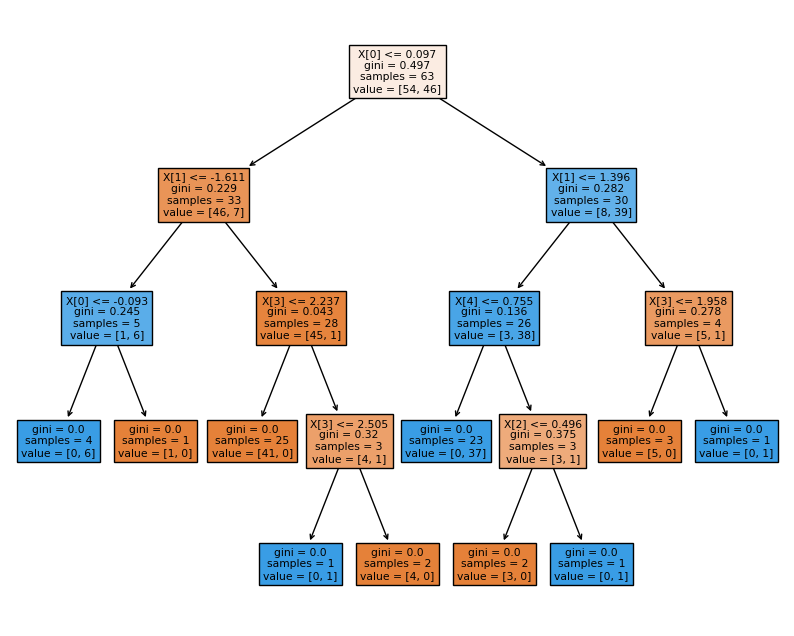

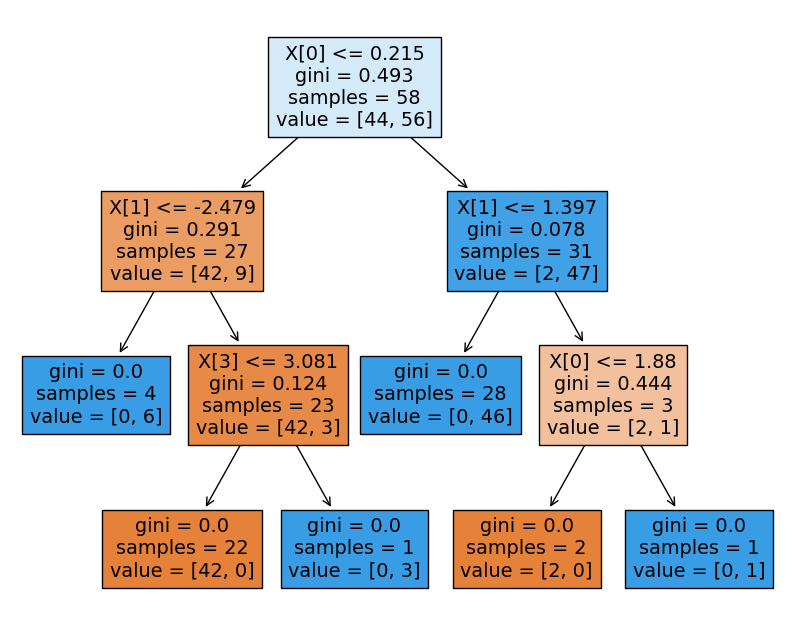

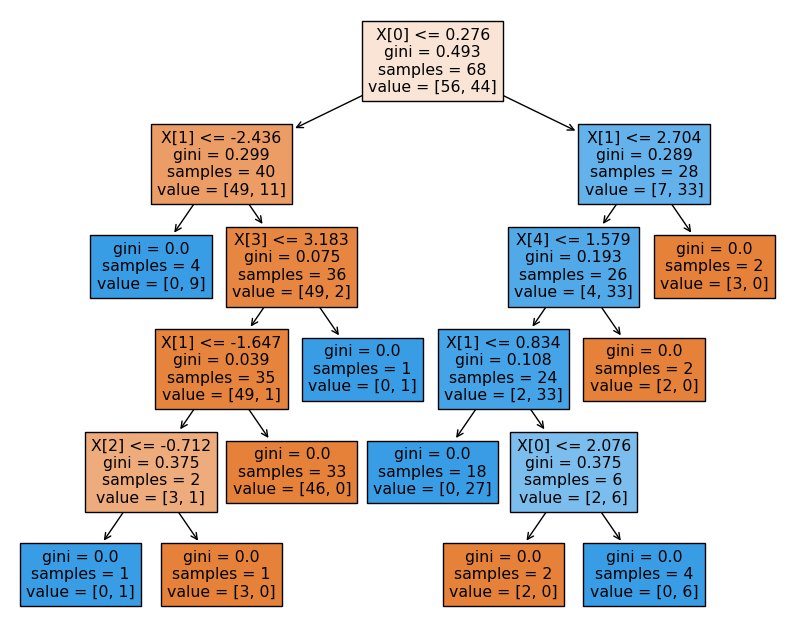

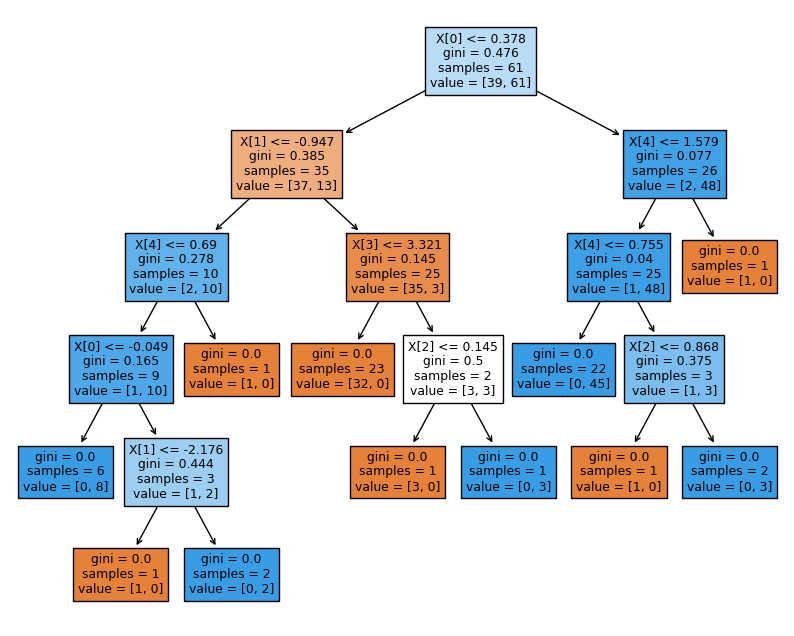

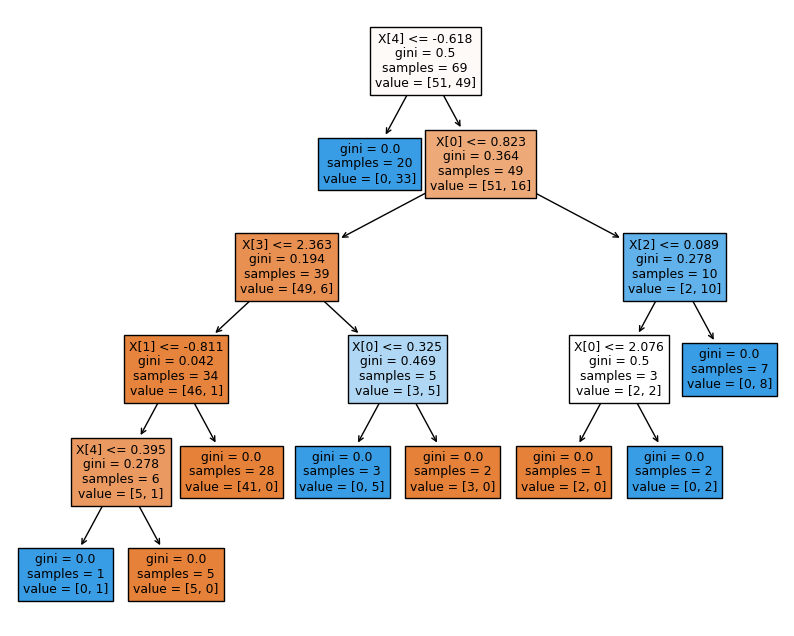

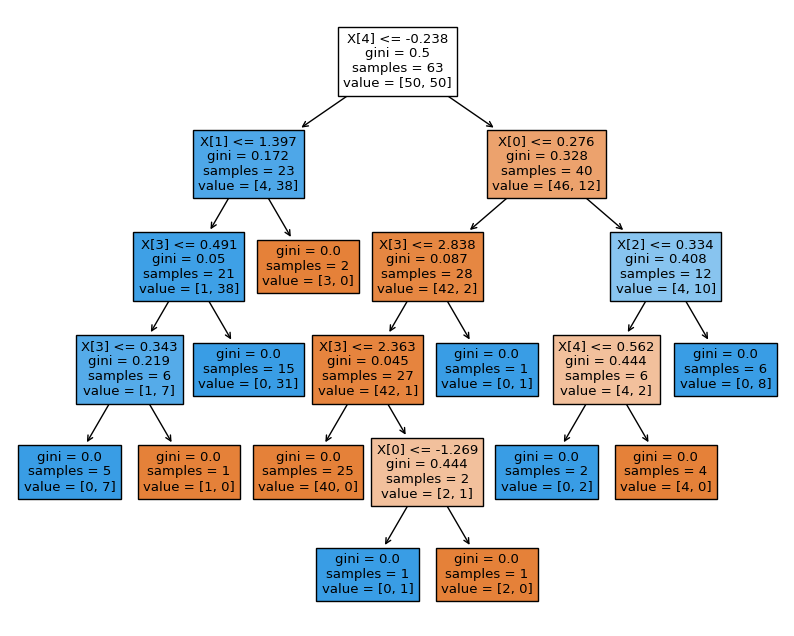

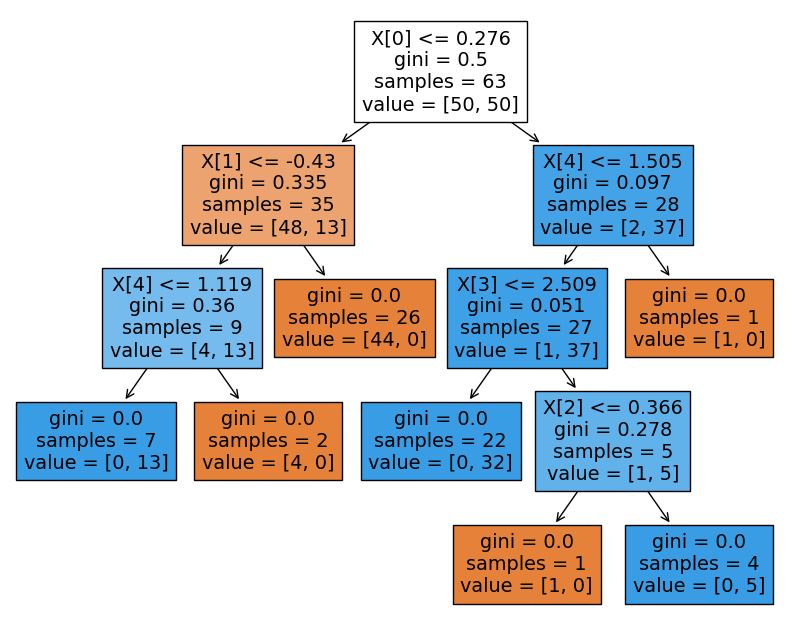

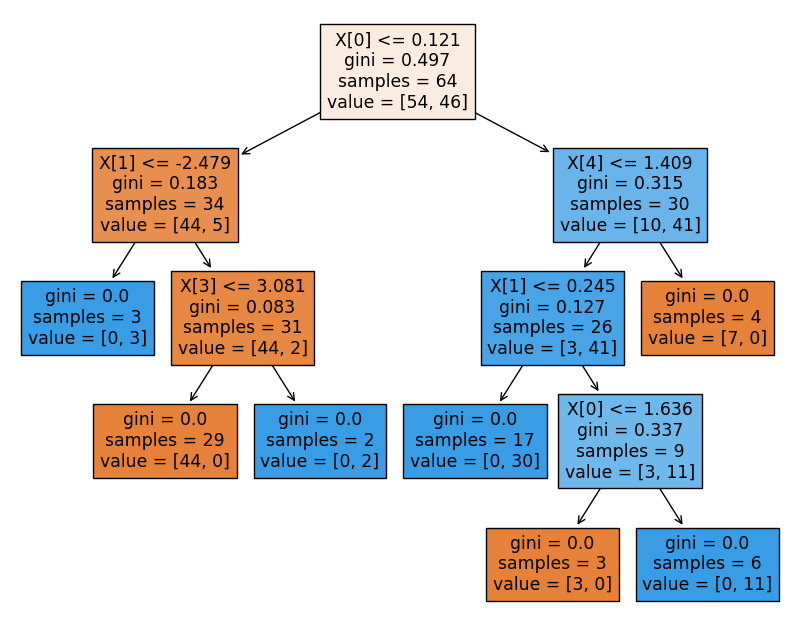

In [19]:
for i in range(0,10):
    plt.figure(figsize=[10,8])
    plot_tree(bag.estimators_[i],filled=True)
    plt.show()

In [20]:
rf=RandomForestClassifier()

In [21]:
rf.fit(df.iloc[:,:5],df.iloc[:,-1])

RandomForestClassifier()

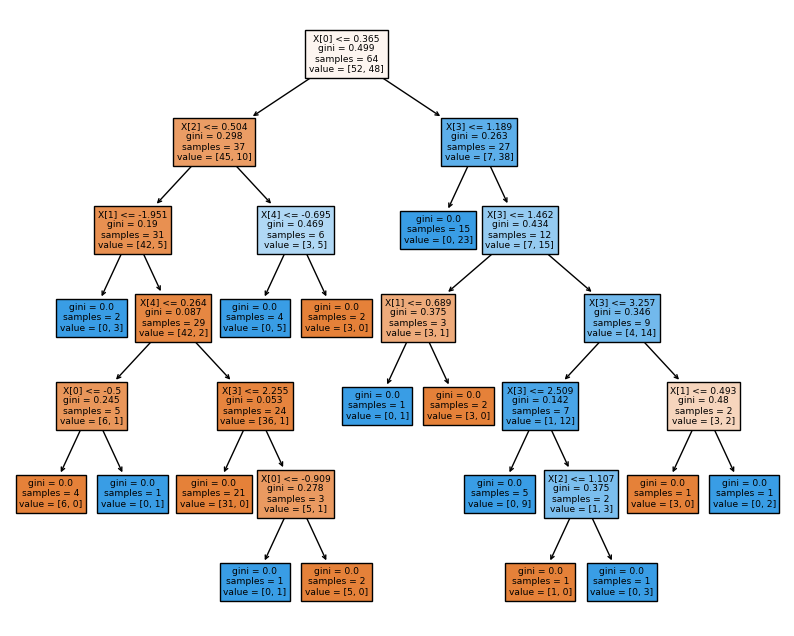

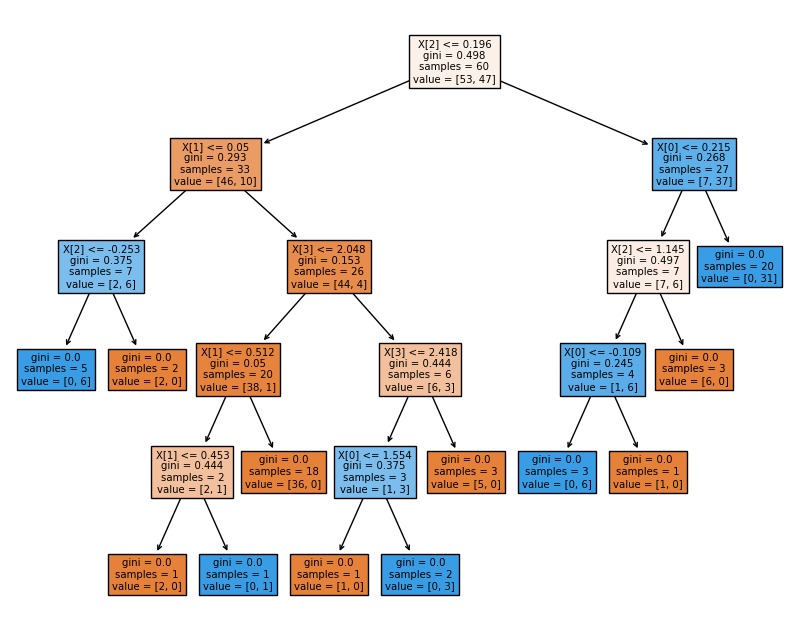

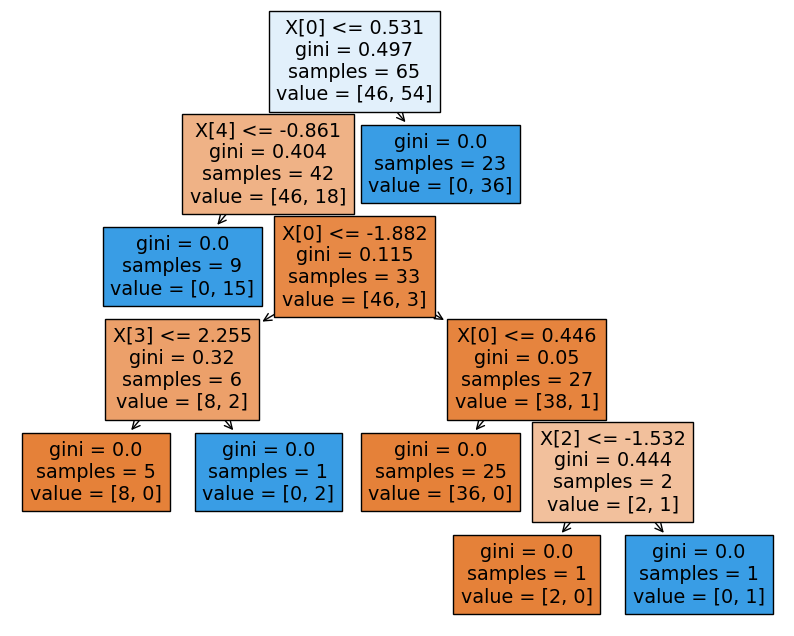

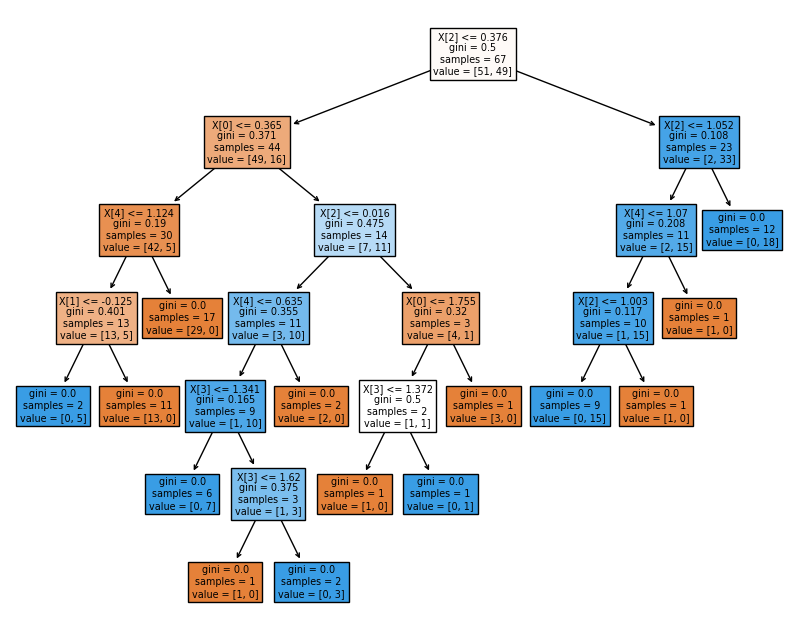

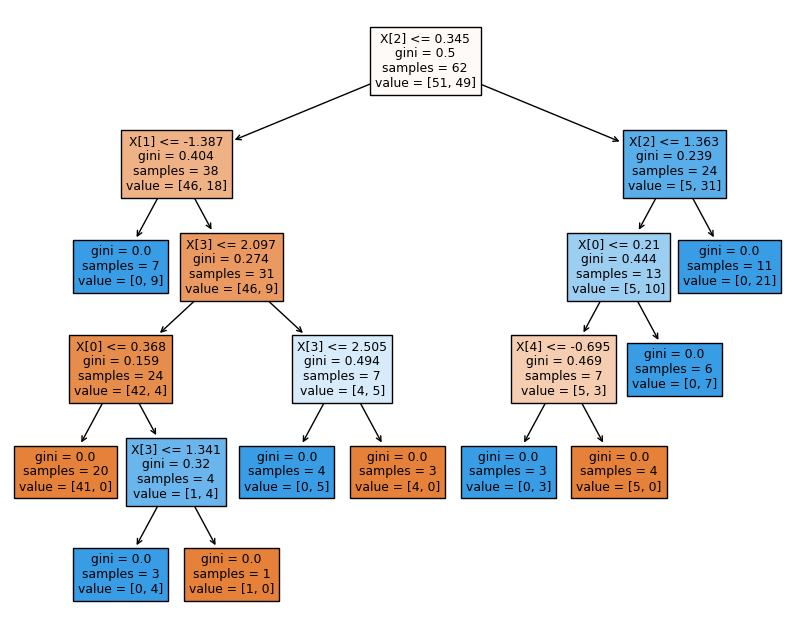

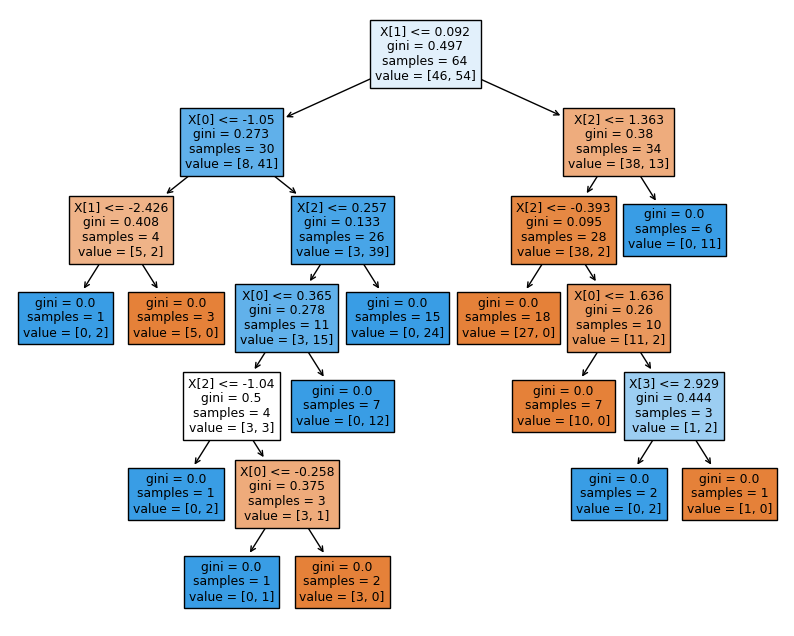

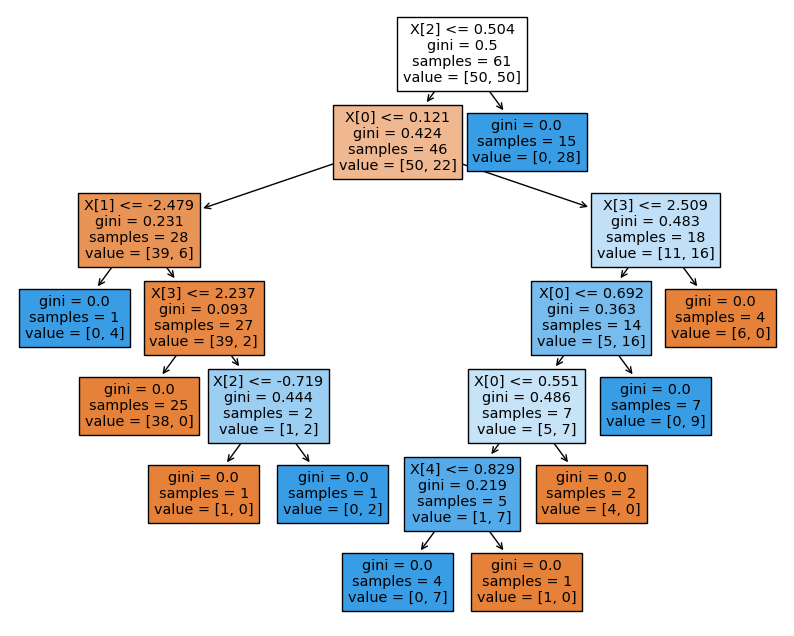

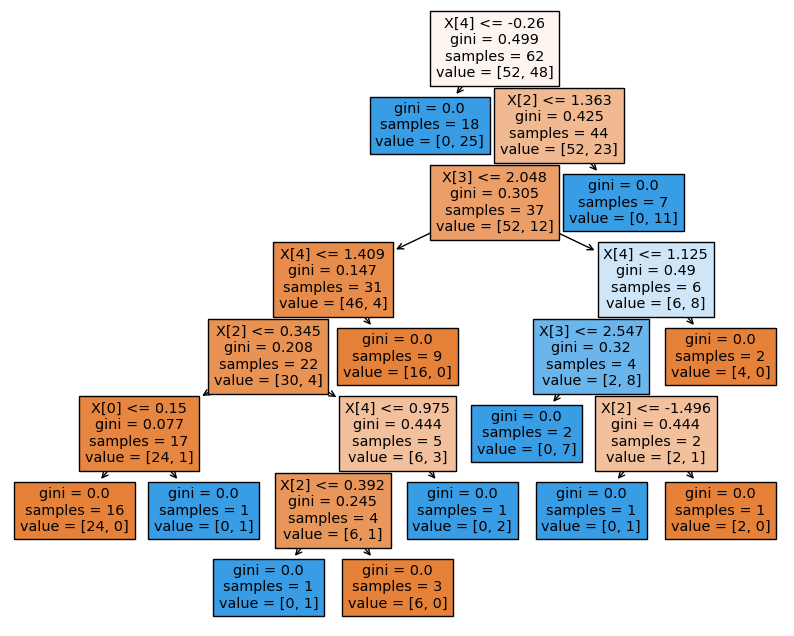

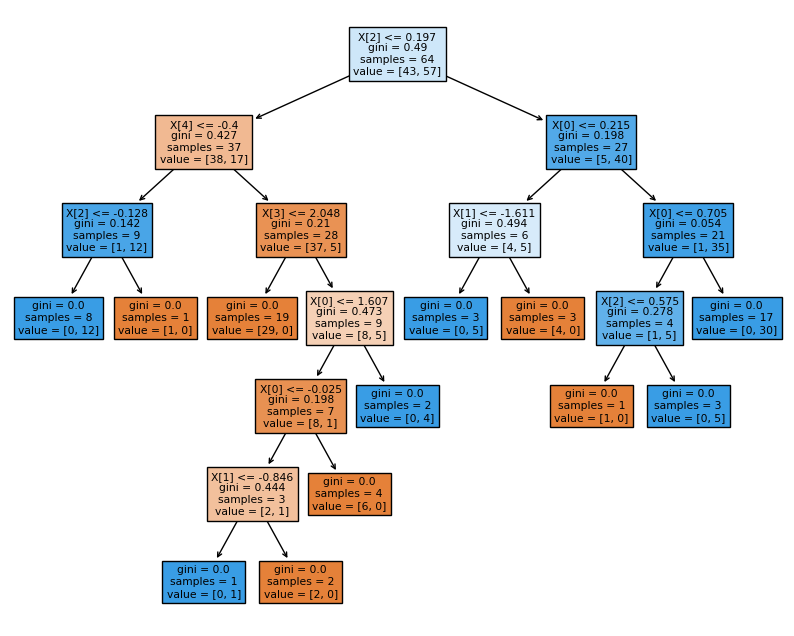

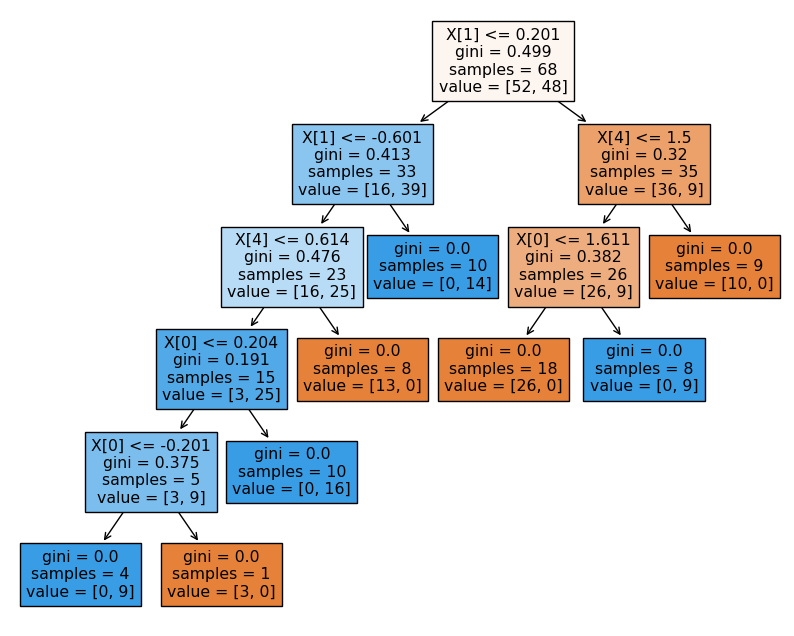

In [22]:
for i in range(0,10):
    plt.figure(figsize=[10,8])
    plot_tree(rf.estimators_[i],filled=True)
    plt.show()

In [23]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split

from sklearn.ensemble import RandomForestClassifier,GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression

from sklearn.metrics import accuracy_score

In [24]:
df=pd.read_csv("heart.csv")

In [25]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [26]:
X=df.iloc[:,:-1]
y=df.iloc[:,-1]

In [27]:
X_train,X_test,y_train,y_test=train_test_split(X,y,random_state=20,test_size=0.30)

In [28]:
y_train.shape

(212,)

In [29]:
X_train.shape

(212, 13)

In [30]:
X_test.shape

(91, 13)

In [31]:
y_test.shape

(91,)

# Random_Forest

In [32]:
rf=RandomForestClassifier()
rf.fit(X_train,y_train)
y_pred_rf=rf.predict(X_test)
accuracy_score(y_test,y_pred_rf)

0.7692307692307693

# gradient_Boosting

In [33]:
gb=GradientBoostingClassifier()

In [34]:
gb.fit(X_train,y_train)

GradientBoostingClassifier()

In [35]:
y_pred_gb=gb.predict(X_test)

In [36]:
accuracy_score(y_test,y_pred_gb)

0.7912087912087912

# SVM

In [37]:
svc=SVC()

In [38]:
svc.fit(X_train,y_train)

SVC()

In [39]:
y_pred_svc=svc.predict(X_test)

In [40]:
accuracy_score(y_test,y_pred_svc)

0.6373626373626373

# Logistic_Regresion

In [41]:
lr=LogisticRegression()

In [42]:
lr.fit(X_train,y_train)

LogisticRegression()

In [43]:
y_pred_lr=lr.predict(X_test)

In [44]:
accuracy_score(y_test,y_pred_lr)

0.7692307692307693

In [45]:
#hyperparameter tunnig

In [46]:
#Random forest classifier

rf2=RandomForestClassifier(max_samples=0.75,random_state=40)
rf2.fit(X_train,y_train)
y_pred_rf2=rf2.predict(X_test)

In [47]:
accuracy_score(y_test,y_pred_rf2)

0.8351648351648352

# cross_val_score

In [48]:
from sklearn.model_selection import cross_val_score

In [49]:
print(cross_val_score(RandomForestClassifier(max_samples=0.75),X,y,cv=5,scoring="accuracy"))
print(np.mean(cross_val_score(RandomForestClassifier(max_samples=0.75),X,y,cv=5,scoring="accuracy")))

[0.80327869 0.90163934 0.7704918  0.81666667 0.8       ]
0.831584699453552


# HyperParameter tunning

In [50]:
from sklearn.model_selection import GridSearchCV

In [51]:
param_grid={
    "n_estimators":[20,60,100,150],
    "max_depth":[2,3,4,5,6],
    "min_samples_split":[2,3,4,5,6,7],
    "min_samples_leaf":[2,3,4]
}
print(param_grid)

{'n_estimators': [20, 60, 100, 150], 'max_depth': [2, 3, 4, 5, 6], 'min_samples_split': [2, 3, 4, 5, 6, 7], 'min_samples_leaf': [2, 3, 4]}


In [52]:
rf3=RandomForestClassifier()

rf3_grid=GridSearchCV(estimator=rf3,
                      param_grid=param_grid,
                     cv=5,
                     verbose=2,
                     n_jobs=-1)
rf3_grid.fit(X_train,y_train)

Fitting 5 folds for each of 360 candidates, totalling 1800 fits


GridSearchCV(cv=5, estimator=RandomForestClassifier(), n_jobs=-1,
             param_grid={'max_depth': [2, 3, 4, 5, 6],
                         'min_samples_leaf': [2, 3, 4],
                         'min_samples_split': [2, 3, 4, 5, 6, 7],
                         'n_estimators': [20, 60, 100, 150]},
             verbose=2)

In [53]:
y_pred_rf3grid=rf3_grid.predict(X_test)

In [54]:
accuracy_score(y_test,y_pred_rf3grid)

0.8021978021978022

In [55]:
# Number of trees in random forest
n_estimators = [20,60,100,120]

# Number of features to consider at every split
max_features = [0.2,0.6,1.0]

# Maximum number of levels in tree
max_depth = [2,8,None]

# Number of samples
max_samples = [0.5,0.75,1.0]

In [56]:
param_grid1={
    "n_estimators":n_estimators,
    "max_features":max_features,
    "max_depth":max_depth,
    "max_samples":max_samples
}
print(param_grid1)

{'n_estimators': [20, 60, 100, 120], 'max_features': [0.2, 0.6, 1.0], 'max_depth': [2, 8, None], 'max_samples': [0.5, 0.75, 1.0]}


In [57]:
rf4=RandomForestClassifier()

In [58]:
rf4_grid=GridSearchCV(estimator=rf4,
                     param_grid=param_grid1,
                     cv=5,
                     verbose=2,
                     n_jobs=-1)
print(rf4_grid)

GridSearchCV(cv=5, estimator=RandomForestClassifier(), n_jobs=-1,
             param_grid={'max_depth': [2, 8, None],
                         'max_features': [0.2, 0.6, 1.0],
                         'max_samples': [0.5, 0.75, 1.0],
                         'n_estimators': [20, 60, 100, 120]},
             verbose=2)


In [59]:
rf4_grid.fit(X_train,y_train)


Fitting 5 folds for each of 108 candidates, totalling 540 fits


GridSearchCV(cv=5, estimator=RandomForestClassifier(), n_jobs=-1,
             param_grid={'max_depth': [2, 8, None],
                         'max_features': [0.2, 0.6, 1.0],
                         'max_samples': [0.5, 0.75, 1.0],
                         'n_estimators': [20, 60, 100, 120]},
             verbose=2)

In [60]:
rf4_grid.best_params_

{'max_depth': 2, 'max_features': 0.2, 'max_samples': 0.5, 'n_estimators': 120}

In [61]:
rf5=RandomForestClassifier(max_depth= 2, max_features= 0.2, max_samples= 0.75, n_estimators= 60)

In [62]:
rf5.fit(X_train,y_train)

RandomForestClassifier(max_depth=2, max_features=0.2, max_samples=0.75,
                       n_estimators=60)

In [63]:
y_pred_rf5=rf5.predict(X_test)
accuracy_score(y_test,y_pred_rf5)

0.8351648351648352

# RandomSearchCV

In [64]:
# Number of trees in random forest
n_estimators = [20,60,100,120]

# Number of features to consider at every split
max_features = [0.2,0.6,1.0]

# Maximum number of levels in tree
max_depth = [2,8,None]

# Number of samples
max_samples = [0.5,0.75,1.0]

# Bootstrap samples
bootstrap = [True,False]

# Minimum number of samples required to split a node
min_samples_split = [2, 5]

# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2]

In [65]:
param_grid={'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
              'max_samples':max_samples,
              'bootstrap':bootstrap,
              'min_samples_split':min_samples_split,
              'min_samples_leaf':min_samples_leaf
             }
print(param_grid)

{'n_estimators': [20, 60, 100, 120], 'max_features': [0.2, 0.6, 1.0], 'max_depth': [2, 8, None], 'max_samples': [0.5, 0.75, 1.0], 'bootstrap': [True, False], 'min_samples_split': [2, 5], 'min_samples_leaf': [1, 2]}


In [66]:
rf6=RandomForestClassifier()

In [67]:
from sklearn.model_selection import RandomizedSearchCV

In [68]:
rf6_randcv=RandomizedSearchCV(estimator=rf6,
                             param_distributions=param_grid,
                             cv=5,
                             verbose=2,
                             n_jobs=-1)

In [69]:
rf6_randcv.fit(X_train,y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits


RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(), n_jobs=-1,
                   param_distributions={'bootstrap': [True, False],
                                        'max_depth': [2, 8, None],
                                        'max_features': [0.2, 0.6, 1.0],
                                        'max_samples': [0.5, 0.75, 1.0],
                                        'min_samples_leaf': [1, 2],
                                        'min_samples_split': [2, 5],
                                        'n_estimators': [20, 60, 100, 120]},
                   verbose=2)

In [70]:
rf6_randcv.best_params_

{'n_estimators': 100,
 'min_samples_split': 5,
 'min_samples_leaf': 1,
 'max_samples': 0.75,
 'max_features': 0.6,
 'max_depth': 8,
 'bootstrap': True}

In [71]:
rf7=RandomForestClassifier(n_estimators= 100,
                         min_samples_split= 5,
                         min_samples_leaf= 1,
                         max_samples= 0.75,
                         max_features= 0.2,
                         max_depth= 8,
                         bootstrap= True)

In [72]:
rf7.fit(X_train,y_train)

RandomForestClassifier(max_depth=8, max_features=0.2, max_samples=0.5,
                       n_estimators=20)

In [73]:
y_pred_rf7=rf7.predict(X_test)

In [74]:
accuracy_score(y_test,y_pred_rf7)

0.7912087912087912